In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

df = pd.read_csv("C:/Users/PMLS/OneDrive/Desktop/student-mat.csv", sep=';')
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [2]:

df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [3]:
df_encoded = df.copy()

# Gender
df_encoded['Gender'] = df_encoded['sex'].map({'M': 1, 'F': 0})
# Internet Access
df_encoded['Internet_Access'] = df_encoded['internet'].map({'yes': 1, 'no': 0})
# Extra Curricular
df_encoded['Extra_Curricular'] = df_encoded['activities'].map({'yes': 1, 'no': 0})
# Parental Education (average of mother and father education)
df_encoded['Parental_Education'] = (df_encoded['Medu'] + df_encoded['Fedu']) / 2

# Final Score as Exam_Score
df_encoded['Exam_Score'] = df_encoded['G3']
study_time_map = {1: 5, 2: 10, 3: 15, 4: 20}
df_encoded['Study_Hours_Per_Week'] = df_encoded['studytime'].map(study_time_map)

df_encoded['Age'] = df_encoded['age']

features = ['Gender', 'Age', 'Parental_Education', 'Study_Hours_Per_Week', 'Internet_Access', 'Extra_Curricular', 'Exam_Score']
df_model = df_encoded[features]

# Study_Efficiency_Score( Bonus feature)
df_model = df_model[df_model['Study_Hours_Per_Week'] != 0]  
df_model['Study_Efficiency_Score'] = df_model['Exam_Score'] / df_model['Study_Hours_Per_Week']

df_model.head()


,Gender,Age,Parental_Education,Study_Hours_Per_Week,Internet_Access,Extra_Curricular,Exam_Score,Study_Efficiency_Score
0,0,18,4.0,10,0,0,6,0.6
1,0,17,1.0,10,1,0,6,0.6
2,0,15,1.0,10,1,0,10,1.0
3,0,15,3.0,15,1,1,15,1.0
4,0,16,3.0,10,0,0,10,1.0


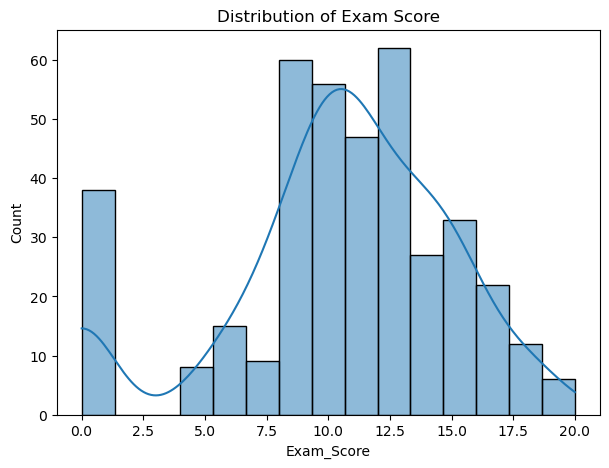

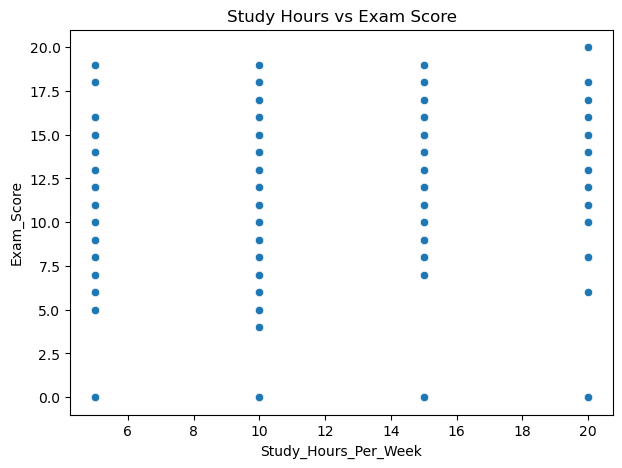

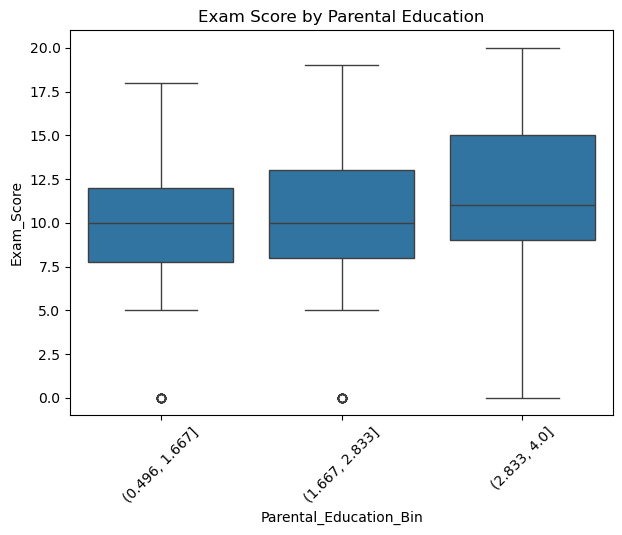

In [4]:

plt.figure(figsize=(7,5))
sns.histplot(df_model['Exam_Score'], kde=True, bins=15)
plt.title('Distribution of Exam Score')
plt.show()


plt.figure(figsize=(7,5))
sns.scatterplot(x='Study_Hours_Per_Week', y='Exam_Score', data=df_model)
plt.title('Study Hours vs Exam Score')
plt.show()


df_model['Parental_Education_Bin'] = pd.cut(df_model['Parental_Education'], bins=3)
plt.figure(figsize=(7,5))
sns.boxplot(x='Parental_Education_Bin', y='Exam_Score', data=df_model)
plt.title('Exam Score by Parental Education')
plt.xticks(rotation=45)
plt.show()

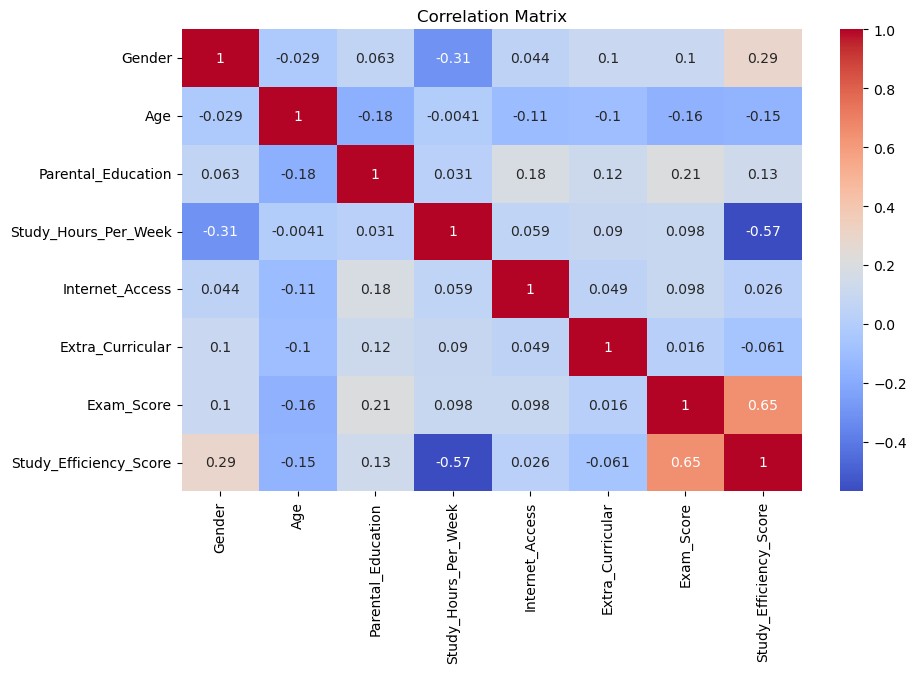

In [5]:
# Drop non-numeric columns before correlation
df_corr = df_model.drop(columns=['Parental_Education_Bin'], errors='ignore')


plt.figure(figsize=(10,6))
sns.heatmap(df_corr.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [6]:
# Features and target
X = df_model[['Gender', 'Age', 'Parental_Education', 'Study_Hours_Per_Week', 'Internet_Access', 'Extra_Curricular', 'Study_Efficiency_Score']]
y = df_model['Exam_Score']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)


rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


def evaluate_model(name, y_true, y_pred):
    print(f"Model: {name}")
    print(f"R^2 Score: {r2_score(y_true, y_pred):.2f}")
    print(f"MSE: {mean_squared_error(y_true, y_pred):.2f}")
    print(f"MAE: {mean_absolute_error(y_true, y_pred):.2f}\n")

evaluate_model("Linear Regression", y_test, y_pred_lr)
evaluate_model("Random Forest", y_test, y_pred_rf)

Model: Linear Regression
R^2 Score: 0.67
MSE: 6.87
MAE: 1.99

Model: Random Forest
R^2 Score: 1.00
MSE: 0.09
MAE: 0.13



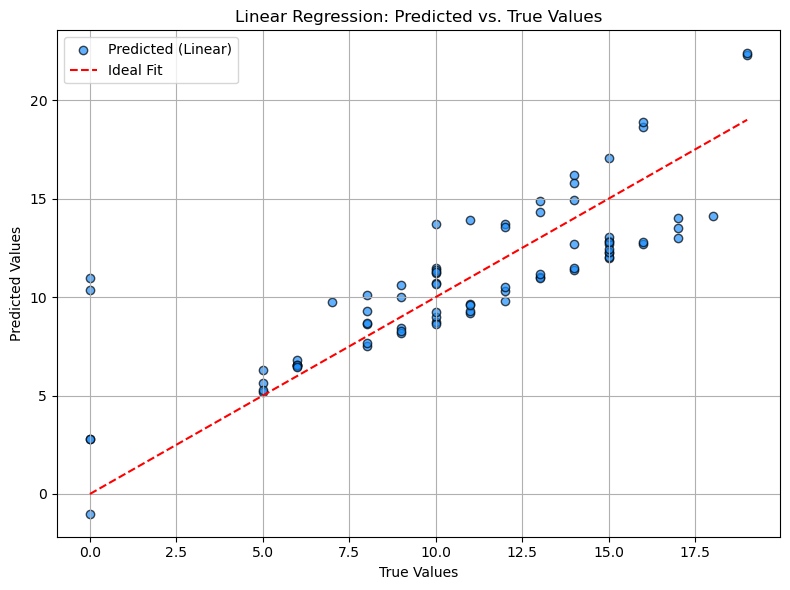

In [10]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_lr, alpha=0.7, color='dodgerblue', edgecolor='k', label="Predicted (Linear)")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', label="Ideal Fit")
plt.title("Linear Regression: Predicted vs. True Values")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

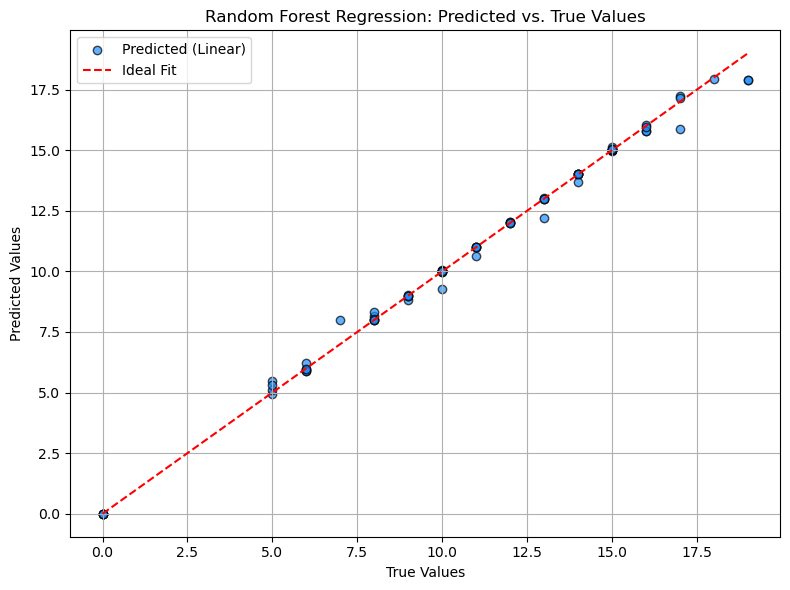

In [11]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.7, color='dodgerblue', edgecolor='k', label="Predicted (Linear)")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', label="Ideal Fit")
plt.title("Random Forest Regression: Predicted vs. True Values")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()